In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib_inline as plt
%matplotlib inline

The first thing is to bring the dataset:



In [3]:
df=pd.read_csv('/content/drive/MyDrive/Makya/Social_Network_Ads.csv')

Now let´s see at high level, what it looks like:

In [4]:
df.info

<bound method DataFrame.info of      Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]>

Let´s plot the data to see if there is some correlation:

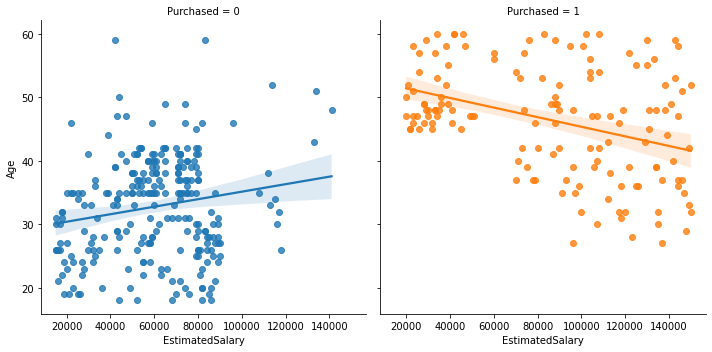

In [5]:
sns.lmplot(x = 'EstimatedSalary', y = 'Age', data = df, hue = 'Purchased', col = 'Purchased')

**First we have to split the dataset into dependent and undependent variables**

In [6]:
x = df.drop('Purchased',axis=1)
y = df['Purchased']

**Now, let´s split the data into training and testing datasets**

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

**Then we create a class of random forest classification**

In [8]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 600)

**Let´s fit the model and predict the outcomes based on the test set**

In [9]:
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

**Now let´s see the classification report**

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        79
           1       0.86      0.88      0.87        41

    accuracy                           0.91       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.91      0.91      0.91       120



**As we can see here, the macro average is 88% and the weighted average is 91% and the recall is pretty high for this model to.**

**Now,** **let´s print the confusion matrix**

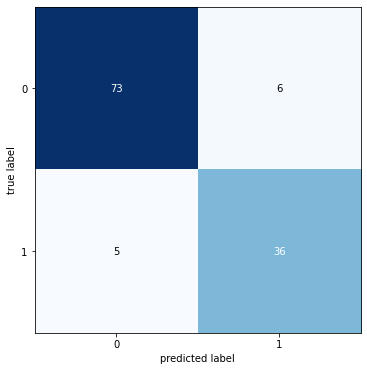

In [11]:
conf_matrix = confusion_matrix(y_test,predictions)

from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6))